<a href="https://colab.research.google.com/github/jesolisp/Curso-Optimizacion/blob/main/codes/JESP_07_Region_confianza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmo de región de confianza (Trust-Region Reflective)

---

<ul>
    <li><strong>Autor:</strong> Jesús Emmanuel Solís Pérez </li>
    <li><strong>Contacto:</strong> <a href="mailto:jsolisp@unam.mx">jsolisp@unam.mx</a>
</ul>

---

# Propósito
El objetivo de este cuaderno es mostrar los fundamentos matemáticos para el algoritmo de región de confianza.

# Preliminares matemáticos

## Trust-Region Reflective (T-RR)

El algoritmo de **región de confianza** recupera información sobre $f$ para construir una función $m_{k}$ cerca del punto $x_{k}$. Puesto que $m_{k}$ no suele ser una aproximación de $f$ cuando $x$ está alejado de $x_{k}$, es necesario restringir la búsqueda en una vecindad de $x_{k}$. Es decir, el paso $p$ está dado a partir de la siguiente aproximación

\begin{equation}
 \label{eqn:trust_region}
 \underset{p}{\min} \left\{ x_{k} + p \right\},
\end{equation}

donde $x_{k} + p$ se encuentra dentro de la región de confianza.

Si la solución candidata no minimiza a $f$, entonces se dice que la región de confianza es muy grande. Por consiguiente, se tiene que reducir la región y volver a resolver el problema dado en la Ec. \eqref{eqn:trust_region}. 

**Observación.** En la práctica, la región de confianza es una esfera definida por $\|p\|_{2}\leq \triangle$, donde el escalar $\triangle >0$ es llamado *radio de la región de confianza*.

Entonces,$m_{k}$ se define como una función cuadrática de la forma

\begin{equation}
 m_{k} \left( x_{k} + p \right) = f_{k} + p^{T} \nabla f_{k} + \frac{1}{2} p^{T}B_{k}p,
\end{equation}

donde $f_{k}$ es una función escalar, $\nabla f_{k}$ es el gradiente en el punto $x_{k}$ en forma de vector, y $B_{k}$ es la matriz Hessiana $\nabla^{2}f_{k}$ o una aproximación a ella.

Considere la siguiente función

\begin{equation}
 f\left(x_{1},x_{2}\right) = 10\left(x_{2} − x_{1}^{2} \right)^{2} + \left(1 − x_{1}\right)^{2},
\end{equation}

donde su gradiente está dado como

\begin{equation}
 \label{eqn:gradiente_fcn}
 \nabla f = \begin{bmatrix}
  \frac{\partial}{\partial x_{1}} f(x_{1},x_{2})\\
  \frac{\partial}{\partial x_{2}} f(x_{1},x_{2}) 
 \end{bmatrix} =
 \begin{bmatrix}
  -40 x_{1} x_{2}+40 x_{1}^{3}+2 x_{1}-2 \\
  20 x_{2}-20 x_{1}^{2}
 \end{bmatrix},
\end{equation}

y la matriz Hessiana 

\begin{equation}
\label{eqn:Hessian_fcn}
 \nabla^{2}f = 
 \begin{bmatrix}
  \frac{\partial^{2}}{\partial x_{1}^{2}} & \frac{\partial^{2}}{\partial x_{1}x_{2}}, \\
  \frac{\partial^{2}}{\partial x_{2}x_{1}} & \frac{\partial^{2}}{\partial x_{2}^{2}} \\
 \end{bmatrix} = 
 \begin{bmatrix}
  -40 \left( x_{2}-x_{1}^{2}\right) +80 x_{1}^{2}+2 & -40x_{1} \\
  -40x_{1} & 20
 \end{bmatrix}.
\end{equation}

En el punto $x_{k} = \begin{bmatrix} 0 & 1 \end{bmatrix}^{T}$, el gradiente \eqref{eqn:gradiente_fcn} y la Hessiana \eqref{eqn:Hessian_fcn} está dada como sigue

\begin{equation}
 \label{eqn:gradiente_fcn_xk}
 \nabla f = \begin{bmatrix}
  -2\\
  20
 \end{bmatrix}, \quad
 \nabla^{2} f = \begin{bmatrix}
  -38 & 0 \\ 0 & 20
 \end{bmatrix}.
\end{equation}

En este cuaderno, asumimos que $m_{k}$ en cada iteración $x_{k}$ es cuadrático. Además, $m_{k}$ está basado en la expansión de la serie de Taylor de la función $f$ alrededor de $x_{k}$, *i.e.*

\begin{equation}
 f\left(x_{k} + p\right) = f_{k} + g_{k}^{T} p + \frac{1}{2}p^{T}\nabla^{2}f\left(x_{k} + tp \right)p,
\end{equation}

donde $f_{k} = f(x_{k})$ y $g_{k} = \nabla f(x_{k})$, $t$ es un escalar tal que $t\in(0,1)$. Considerando que $B_{k}$ es una aproximación a la Hessiana en el término de segundo orden, tenemos

\begin{equation}
 m_{k}(p) = f_{k} + g_{k}^{T}p + \frac{1}{2}p^{T}B_{k}p,
\end{equation}

donde $B_{k}$ es una matriz simétrica.

Asumiendo que $B_{k}$ es simétrica y además delimitado uniformemente, en cada paso se obtiene una solución al siguiente problema

\begin{equation}
 \label{eqn:min_trf}
 \underset{p\in\mathbb{R}^{n}}{\min} m_{k}(p) = f_{k} + g_{k}^{T}p + \frac{1}{2}p^{T}B_{k}p, \quad ||p|| \leq \triangle_{k}.
\end{equation}

Dado un paso $p_{k}$ definimos el relación

\begin{equation}
 \label{eqn:ratio}
 \rho_{k} = \frac{f(x_{k})-f(x_{k}+p_{k})}{m_{k}(0) - m_{k}(p_{k})},
\end{equation}

donde el numerador es llamado *minimización real* y el denominador es la *minimización predicha*. En otras palabras,  la minimización en $f$ por la función del modelo).

El siguiente algoritmo resume el método de *región de confianza*.

**Algoritmo 1. Trust-Region Reflective**
1. Dado $\hat{\triangle}>0$, $\triangle_{0} \in \left(0, \hat{\triangle} \right)$, $\eta \in \left[0, \frac{1}{4}\right)$
2. **for** $k=1,2,3,\dots$
    1. Resolver la Ec. \eqref{eqn:min_trf} para aproximar $B_{k}$.
    2. Evaluar $\rho_{k}$ a partir de la Ec. \eqref{eqn:ratio}
        1. **if** $\rho_{k}< \frac{1}{4}$
            1. $\triangle_{k+1} = \frac{1}{4}\triangle_{k}$
        2. **else**
            1. **if** $\rho> \frac{3}{4}$ y $||p_{k}|| = \triangle_{k}$
                1. $\triangle_{k+1} = \min(2\triangle_{k},\hat{\triangle})$
            2. **else**
                1. $\triangle_{k+1} = \triangle_{k}$
        3. **if** $\rho_{k}>\eta$
                1. $x_{k+1} = x_{k} + p_{k}$
        4. **else**
                2. $x_{k+1} = x_{k}$
3. **end**

donde $\hat{\triangle}$ es un límite general en las longitudes de los pasos. Para que el **Algoritmo 1** sea implementable, se debe resolver el subproblema de región de confianza \eqref{eqn:min_trf}.

## Método de Dogleg
Este método se utiliza cuando $B$ es definida positiva. Cuando ocurre esto, el minimizador sin restricción de $m$ es $p^{B} = -B^{-1}g$. Cuando este punto es factible para \eqref{eqn:min_trf}, obviamente es una solución, por lo que tenemos

\begin{equation}
 p^{\star}(\triangle) = p^{B}, \quad \text{cuando } \triangle \geq ||p^{B}||.
\end{equation}

Cuando $\triangle$ es relativamente pequeño a $p^{B}$, la restricción $||p||\leq\triangle$ asegura que el término cuadrático en $m$ tiene poco efecto en la solución de \eqref{eqn:min_trf}. Obteniendo una aproximación a $p(\triangle)$ quitando el término cuadrático de \eqref{eqn:min_trf} tenemos

\begin{equation}
 p^{\star}(\triangle) \approx -\triangle \frac{g}{||g||}, \text{cuando }\triangle \text{es pequeño}.
\end{equation}

El método Dogled reemplaza la trayectoria para $p^{\star}(\triangle)$ con una ruta de dos segmentos. El primer segmento va desde el origen al minimizador de $m$ a lo largo de la dirección de descenso más inclinada

\begin{equation}
 p^{U} = -\frac{g^{T}g}{g^{T}Bg}g,
\end{equation}

mientras que el segundo segmento va de $p^{U}$ a $p^{B}$. Estra trayectoria está definida para $\tau \in [0, 2]$ como

\begin{equation}
 \tilde{p}(\tau) = 
 \left\{
  \begin{matrix}
   \tau p^{U}, & 0 \leq \tau < 1, \\
   p^{U} + (\tau-1)(p^{B} - p^{U}), & 1 \leq \tau  2.
  \end{matrix}
 \right.
\end{equation}

Dado que $m$ es decreciente, el valor de $p$ estará en $p^{B}$ si $||p^{B}||\leq \triangle$ de lo contrario, en el punto de intersección del dogleg y el límite de la región de confianza. Para este caso, calculamos $\tau$ a partir de la siguiente ecuación cuadrática escalar

\begin{equation}
 \left|\left|p^{U} + (\tau - 1)(p^{B}-p^{U})\right|\right| ^{2} = \triangle^{2}
\end{equation}



# Setup

## Library import
We import all the required Python libraries

In [ ]:
# Data manipulation
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
from matplotlib import cm
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100
plt.rcParams['text.usetex'] = True
plt.rcParams["font.family"] = "serif"
plt.rc('axes', titlesize=20)        # Controls Axes Title
plt.rc('axes', labelsize=20)        # Controls Axes Labels
plt.rc('xtick', labelsize=20)       # Controls x Tick Labels
plt.rc('ytick', labelsize=20)       # Controls y Tick Labels
plt.rc('legend', fontsize=15)       # Controls Legend Font
plt.rc('figure', titlesize=15)      # Controls Figure Title
%matplotlib inline

# Autoreload extension
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
    
%autoreload 2

# Definición de funciones
Definimos todas las funciones que comprenden el método T-RR considerando el método de Dogleg.

In [ ]:
def dogleg(H, g, B, trust_radius):
    """
    Parameters
    ----------
    H : TYPE
        𝑝𝐵=−𝐵^{−1}𝑔.
    g : TYPE
        Gradiente de la función objetivo.
    B : TYPE
        Aproximación a la matrix Hessiana.
    trust_radius : TYPE
        Región de confianza.

    Retorna
    -------
    TYPE
        DESCRIPTION.

    """
    pB = -np.dot(H,g) # pB=-B^{−1}g
    
    # Verifica si el paso se encuentra dentro de la región de confianza
    if np.linalg.norm(pB) <= trust_radius:
        return pB
    
    pU = -(np.dot(g,g)/np.dot(g,np.dot(B,g)))*g # Ec. (13)
    
    dot_pU = np.dot(pU, pU)
    norm_pU = np.sqrt(dot_pU)
    
    if norm_pU >= trust_radius:
        return trust_radius * pU / norm_pU
    
    # Resolver Ec. (15)
    # ||pu**2 +(tau-1)*(pb-pu)**2|| = trust_radius**2
    pb_pu = pB - pU
    pb_pu_sq = np.dot(pb_pu, pb_pu)
    pu_pb_pu_sq = np.dot(pU, pb_pu)
    d = pu_pb_pu_sq**2 - pb_pu_sq*(dot_pU - trust_radius**2)
    tau = (-pu_pb_pu_sq + np.sqrt(d)) / pb_pu_sq+1    # 0<tau<2
    
    # Ec. (14)
    if 0 <= tau and tau < 1:
        return tau*pU
    
    if 1 <= tau and tau < 2:
        return pU + (tau - 1)*(pB - pU)

In [ ]:
def trust_region_reflective(x0, F, gradF, B, eta = 0.15,tol=1e-4, max_trust_radius=1.0):
    """
    Parámetros
    ----------
    x0 : TYPE
        Puntos iniciales.
    F : TYPE
        Función objetivo.
    gradF : TYPE
        Gradiente de la función.
    B : TYPE
        Aproximación a la función Hessiana.
    eta : TYPE, optional
        DESCRIPTION. The default is 0.15.
    tol : TYPE, optional
        DESCRIPTION. The default is 1e-4.
    max_trust_radius : TYPE, optional
        DESCRIPTION. The default is 1.0.

    Retorna
    -------
    TYPE
        Mínimos de la función.
    r : TYPE
        Región de confianza.
    """
    xx = [] # to store the iterates
    
    #initial point
    x = x0
    r = [] # to store the trust radius at each iteration
    
    #initial radius
    trust_radius = 0.1 # radio de confianza inicial
    r.append(trust_radius)
    xx.append(x)
    
    while True :
        g = gradF # Gradiente de la función objetivo
        H = np.linalg.inv(B(x)) # Inversa de la matriz Hessiana
        p = dogleg(H, g(x), B(x), trust_radius) 
        rho = (F(x) - F(x + p))/(-(np.dot(g(x), p) + 1/2*np.dot(p, np.dot(B(x),p)))) # Ec. (10)
        
        # Algoritmo 1. JESP_07_Region_confianza (Jupyter notebook)
        if rho < 1/4:
            trust_radius = 1/4*trust_radius
        else:
            if rho > 3/4 and np.linalg.norm(p) == trust_radius:
                trust_radius = min(2.0 * trust_radius, max_trust_radius)
            else:
                trust_radius = trust_radius
                
        r.append(trust_radius)
        
        if rho > eta:
            x = x + p
        
        xx.append(x)
        
        if np.linalg.norm(g(x)) < tol:
            break
        
    return F(x), np.asarray(xx)

# Caso I. Función de dos variables

Sea la función

\begin{equation}
  f\left(x_{1},x_{2}\right) = \left(x_{1} - 2\right)^{4} + x_{2}^{2}\left(x_{1} - 2\right)^{2} + \left(x_{2} + 1\right)^{2},
\end{equation}

encuentre los valores mínimos utilizando el algoritmo de LS.

In [ ]:
X0 = np.array([7,8]) # Puntos iniciales
eta = 0.15 # η ∈ (0, 14)
tol = 1e-4; # Tolerancia del algoritmo
max_trust_radius = 0.9 # Radio máximo de confianza

F = lambda x: (x[0] - 2)**4 + x[1]**2*(x[0] - 2)**2 + (x[1] + 1)**2
gradF = lambda x: np.array([4*(x[0] - 2)**3 + x[1]**2*(2*x[0] - 4),2*x[1] + 2*x[1]*(x[0] - 2)**2 + 2])
B = lambda x: np.array([[2*x[1]**2+12*(x[0]-2)**2, 4*(x[0]-2)*x[1]],
                        [4*(x[0]-2)*x[1], 2*(x[0]-2)**2+2]])

Fmin, xk = trust_region_reflective(X0, F, gradF, B, eta, tol)

## Graficación de resultados

In [ ]:
xmin = -10 # coordenada mínima
xmax =  10 # coordenada máxima
dx = 0.5 # distancia entre coordenadas consecutivas

dom = np.arange(xmin,xmax,dx)
X,Y = np.meshgrid(dom,dom)
F = lambda x1,x2: (x1 - 2)**4 + x2**2*(x1 - 2)**2 + (x2 + 1)**2

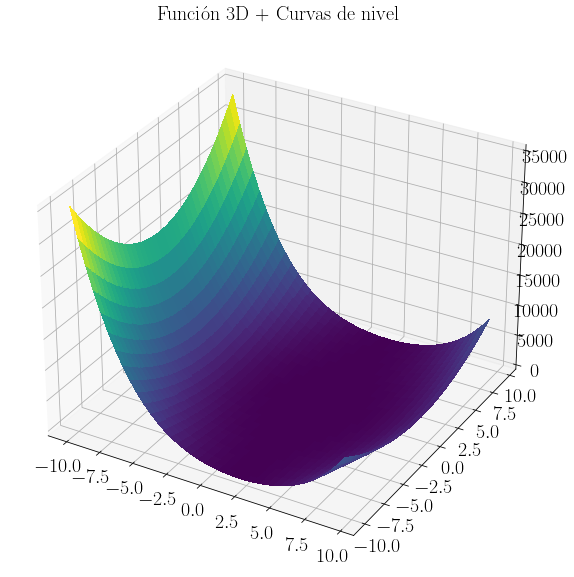

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(15,10))
surf = ax.plot_surface(X, Y, F(X,Y), cmap=cm.viridis,linewidth=0, antialiased=False)
plt.title('Función 3D + Curvas de nivel')
plt.show()

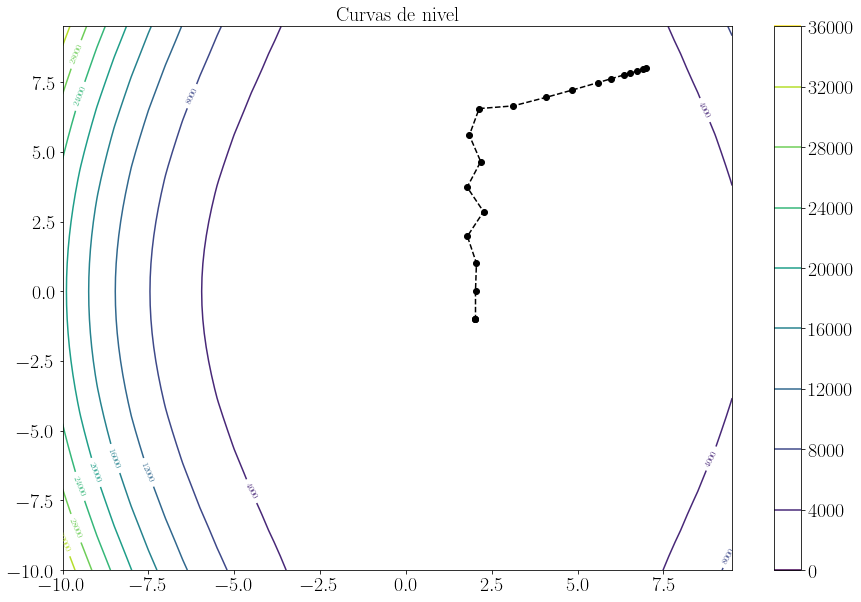

In [ ]:
plt.figure(figsize=(15,10))
contours = plt.contour(X, Y, F(X,Y), 10)
plt.clabel(contours, inline=True, fontsize=8)
plt.colorbar()
plt.plot(xk[:,0], xk[:,1],'o--k')
plt.title('Curvas de nivel')
plt.show()

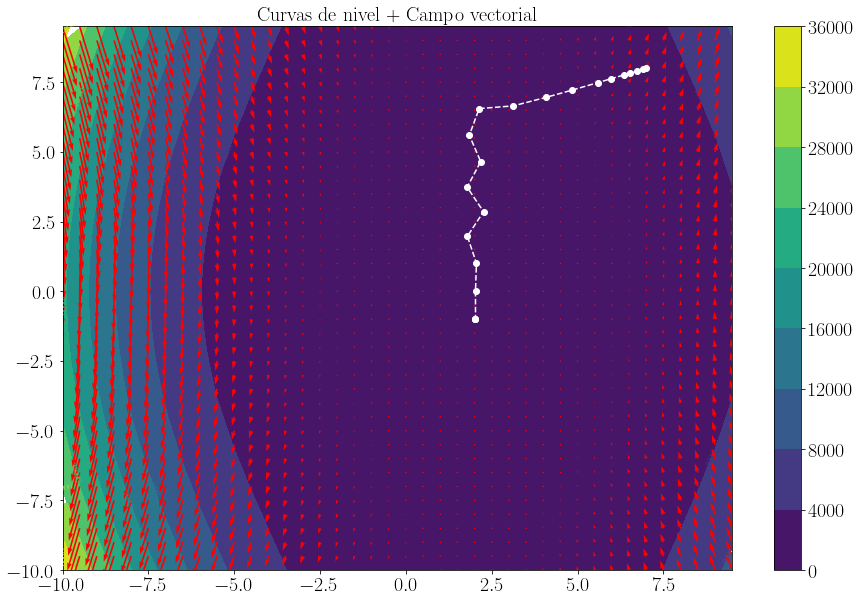

In [ ]:
plt.figure(figsize=(15,10))
gradx,grady = np.gradient(F(X,Y),dx)
contours = plt.contourf(X,Y,F(X,Y), 10)
plt.clabel(contours, inline=True, fontsize=8)
plt.colorbar()
plt.plot(xk[:,0], xk[:,1],'o--w')
plt.quiver(X,Y,gradx,grady, color = 'red')
plt.title('Curvas de nivel + Campo vectorial')
plt.show()

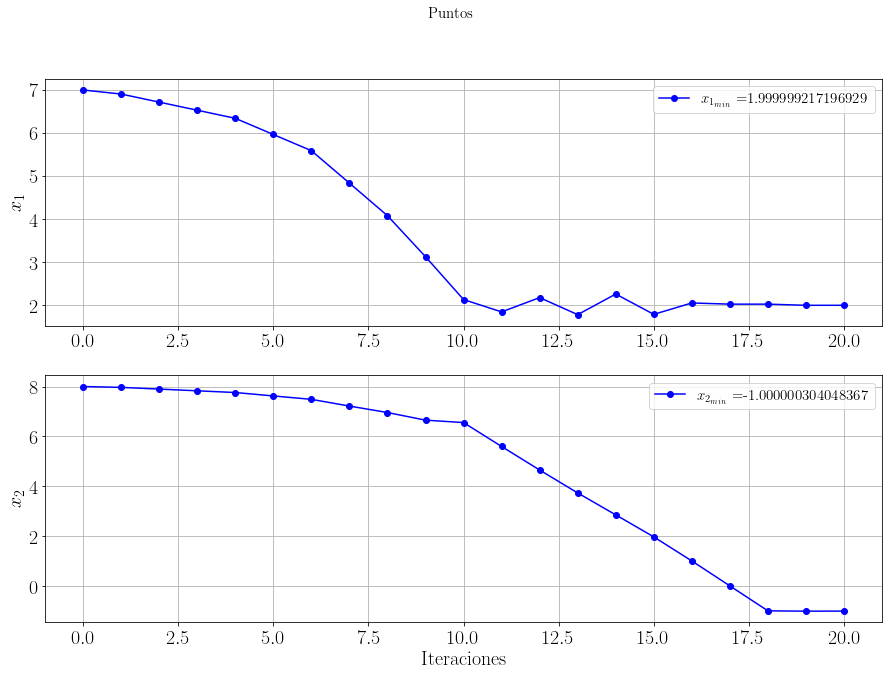

In [ ]:
iterations = np.arange(0,len(xk))

fig, axs = plt.subplots(2, figsize = (15,10))
fig.suptitle('Puntos')
axs[0].plot(iterations,xk[:,0],'o-b', label = '$x_{1_{min}} =$'+str(xk[-1,0]))
# axs[0].plot(iterations,xk[:,0],'o-b', label = '$x_{1_{min}} =$')
axs[0].grid('on')
axs[0].set_ylabel('$x_{1}$')
axs[0].legend()

axs[1].plot(iterations,xk[:,1],'o-b', label = '$x_{2_{min}} =$'+str(xk[-1,1]))
# axs[1].plot(iterations,xk[:,1],'o-b', label = '$x_{2_{min}} =$')
axs[1].grid('on')
axs[1].set_ylabel('$x_{2}$')
axs[1].set_xlabel('Iteraciones')
axs[1].legend()
plt.show()

# Caso II. Función Booth
La función Booth está definida por

\begin{equation}
 f\left(x_{1} , x_{2}\right) = \left(x_{1} + 2x_{2} − 7\right)^{2} + \left(2x_{1} + x_{2} − 5\right)^{2}.
\end{equation}

Utilice el método de LS para minimizar la función de Booth considerando que el espacio de búsqueda está dado por $x_{i} \in [-10,10] \forall i=1,2$. Además, considere como punto inicial

\begin{equation}
 x_{0} = \begin{bmatrix} 10 & 0 \end{bmatrix}^{T}.
\end{equation}

In [ ]:
X0 = np.array([10,0]) # Puntos iniciales
#X0 = np.array([[np.random.rand()],[np.random.rand()]])

eta = 0.15 # η ∈ (0, 14)
tol = 1e-4; # Tolerancia del algoritmo
max_trust_radius = 0.9 # Radio máximo de confianza
    
# Función objetivo
F = lambda x: np.power((x[0] + 2*x[1] - 7),2) + np.power((2*x[0] + x[1] - 5),2)
gradF = lambda x: np.array([8*x[1] + 10*x[0] - 34,10*x[1] + 8*x[0] - 38])
B = lambda x: np.array([[10, 8],
                                                [8, 10]])
    
Fmin, xk = trust_region_reflective(X0, F, gradF, B, eta, tol)

## Graficación de resultados

In [ ]:
xmin = -10 # coordenada mínima
xmax =  10 # coordenada máxima
dx = 0.5 # distancia entre coordenadas consecutivas

dom = np.arange(xmin,xmax,dx)
X,Y = np.meshgrid(dom,dom)
F = lambda x1,x2:  (x1 + 2*x2 - 7)**2 + (2*x1 + x2 - 5)**2

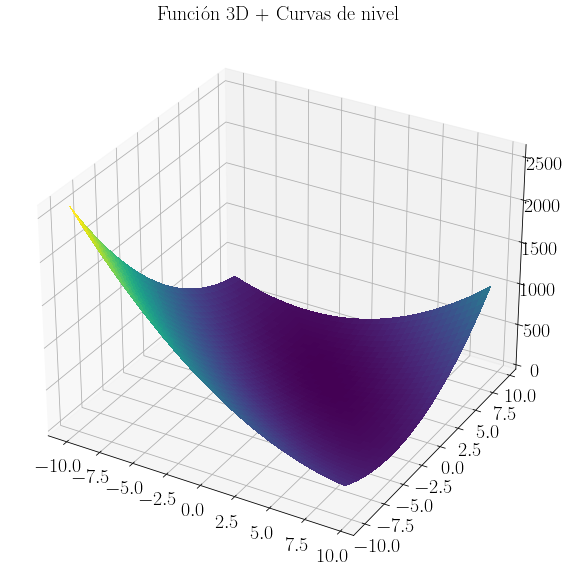

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(15,10))
surf = ax.plot_surface(X, Y, F(X,Y), cmap=cm.viridis,linewidth=0, antialiased=False)
plt.title('Función 3D + Curvas de nivel')
plt.show()

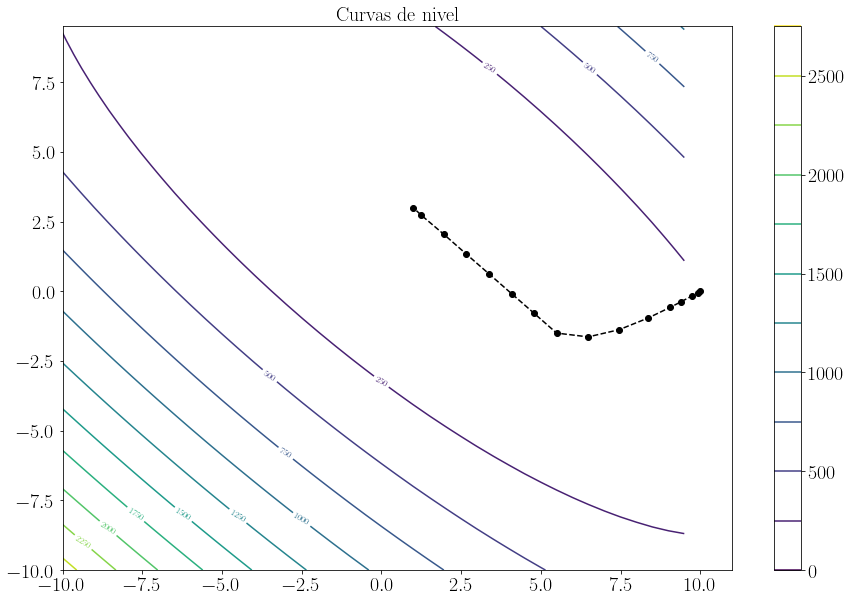

In [ ]:
plt.figure(figsize=(15,10));
contours = plt.contour(X, Y, F(X,Y), 10)
plt.clabel(contours, inline=True, fontsize=8)
plt.colorbar()
plt.plot(xk[:,0], xk[:,1],'o--k')
plt.title('Curvas de nivel')
plt.show()

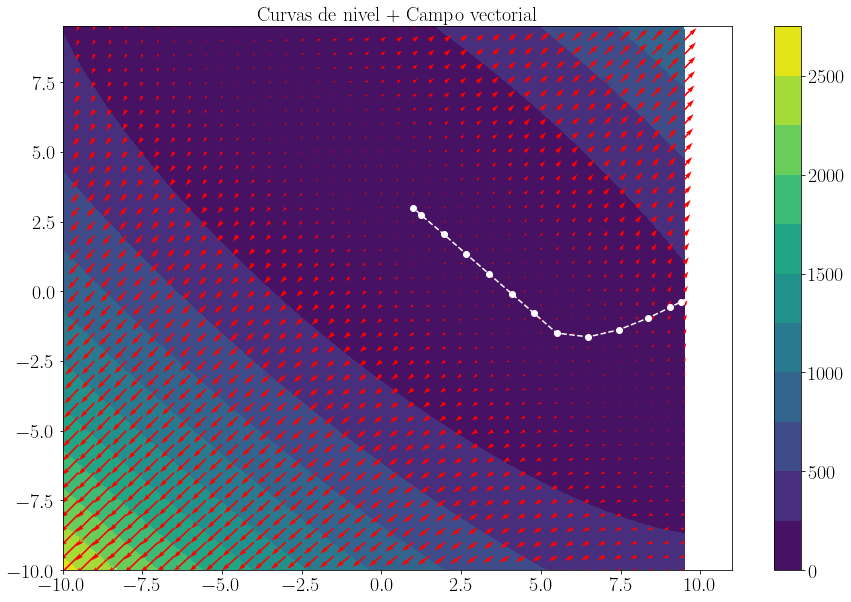

In [ ]:
plt.figure(figsize=(15,10))
gradx,grady = np.gradient(F(X,Y),dx)
contours = plt.contourf(X,Y,F(X,Y), 10)
plt.clabel(contours, inline=True, fontsize=8)
plt.colorbar()
plt.plot(xk[:,0], xk[:,1],'o--w')
plt.quiver(X,Y,gradx,grady, color = 'red')
plt.title('Curvas de nivel + Campo vectorial')
plt.show()

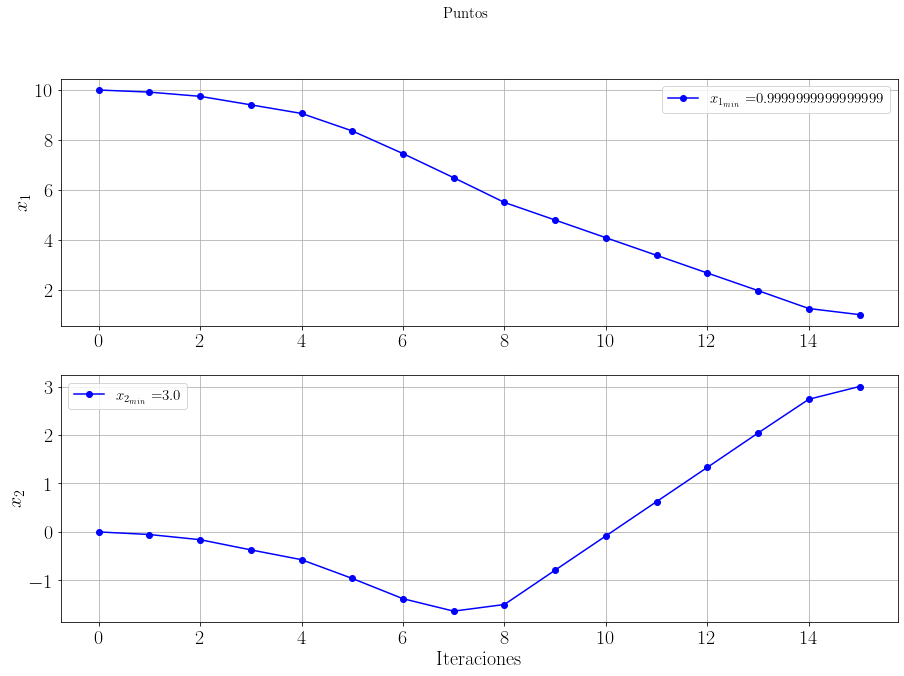

In [ ]:
iterations = np.arange(0,len(xk))
       
fig, axs = plt.subplots(2, figsize=(15,10))
fig.suptitle('Puntos')
axs[0].plot(iterations,xk[:,0],'o-b', label = '$x_{1_{min}} =$'+str(xk[-1,0]))
# axs[0].plot(iterations,xk[:,0],'o-b', label = '$x_{1_{min}} =$')
axs[0].grid('on')
axs[0].set_ylabel('$x_{1}$')
axs[0].legend()

axs[1].plot(iterations,xk[:,1],'o-b', label = '$x_{2_{min}} =$'+str(xk[-1,1]))
# axs[1].plot(iterations,xk[:,1],'o-b', label = '$x_{2_{min}} =$')
axs[1].grid('on')
axs[1].set_ylabel('$x_{2}$')
axs[1].set_xlabel('Iteraciones')
axs[1].legend()
plt.show()

# Caso III. Función de Matyas
La función de Matyas está definida por

\begin{equation}
 f\left(x_{1},x_{2}\right) = 0.26\left(x_{1}^{2} + x_{2}^{2}\right)- 0.48x_{1}x_{2}.
\end{equation}

Utilice el método de LS para minimizar la función de Booth considerando que el espacio de búsqueda está dado por $x_{i} \in [-10,10] \forall i=1,2$. Además, considere como punto inicial

\begin{equation}
 x_{0} = \begin{bmatrix} 5 & -5 \end{bmatrix}^{T}.
\end{equation}

In [ ]:
X0 = np.array([5,-5]) # Puntos iniciales
#X0 = np.array([[np.random.rand()],[np.random.rand()]])
    
eta = 0.15 # η ∈ (0, 14)
tol = 1e-4; # Tolerancia del algoritmo
max_trust_radius = 0.9 # Radio máximo de confianza
    
# Función objetivo
F = lambda x: 0.26*(x[0]**2+x[1]**2)-0.48*x[0]*x[1]
gradF = lambda x: np.array([-(12*x[1]-13*x[0])/25,
                                                           (13*x[1]-12*x[0])/25])
B = lambda x: np.array([[0.52, -0.48],
                                                [-0.48, 0.52]])
    
Fmin, xk = trust_region_reflective(X0, F, gradF, B, eta, tol)

## Graficación de resultados

In [ ]:
xmin = -10 # coordenada mínima
xmax =  10 # coordenada máxima
dx = 0.5 # distancia entre coordenadas consecutivas

dom = np.arange(xmin,xmax,dx)
X,Y = np.meshgrid(dom,dom)
F = lambda x1,x2: (x1 - 2)**4 + x2**2*(x1 - 2)**2 + (x2 + 1)**2

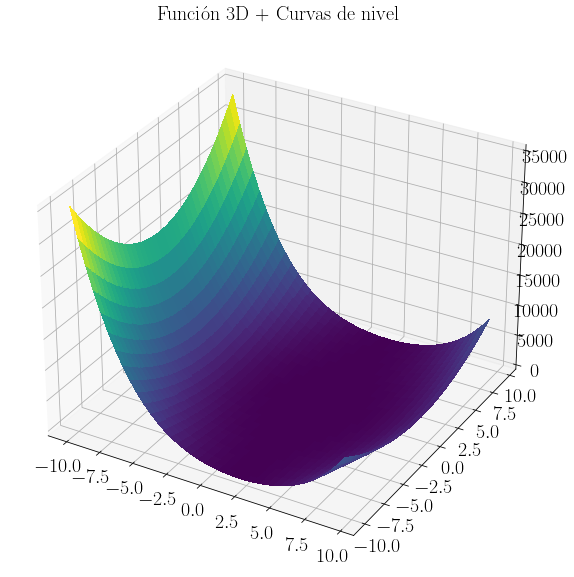

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(15,10))
surf = ax.plot_surface(X, Y, F(X,Y), cmap=cm.viridis,linewidth=0, antialiased=False)
plt.title('Función 3D + Curvas de nivel')
plt.show()

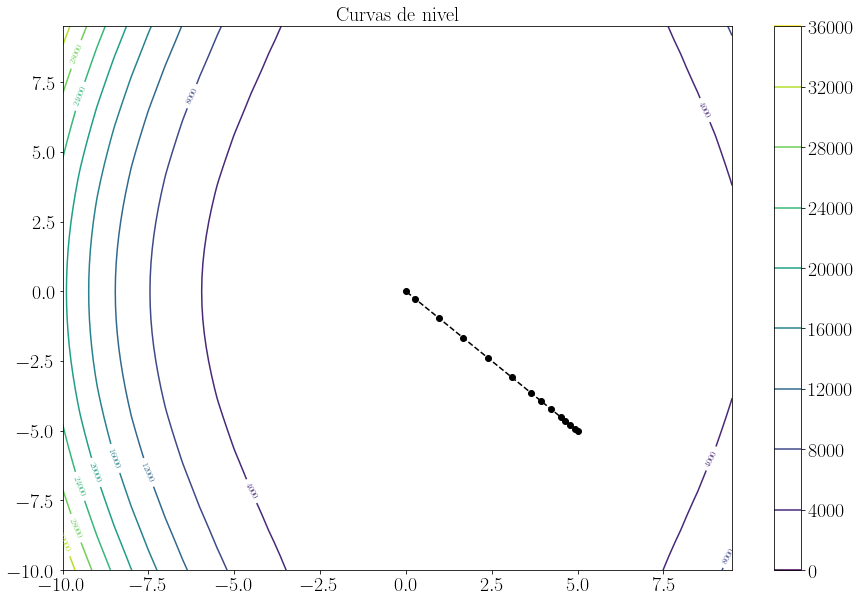

In [ ]:
plt.figure(figsize=(15,10));
contours = plt.contour(X, Y, F(X,Y), 10)
plt.clabel(contours, inline=True, fontsize=8)
plt.colorbar()
plt.plot(xk[:,0], xk[:,1],'o--k')
plt.title('Curvas de nivel')
plt.show()

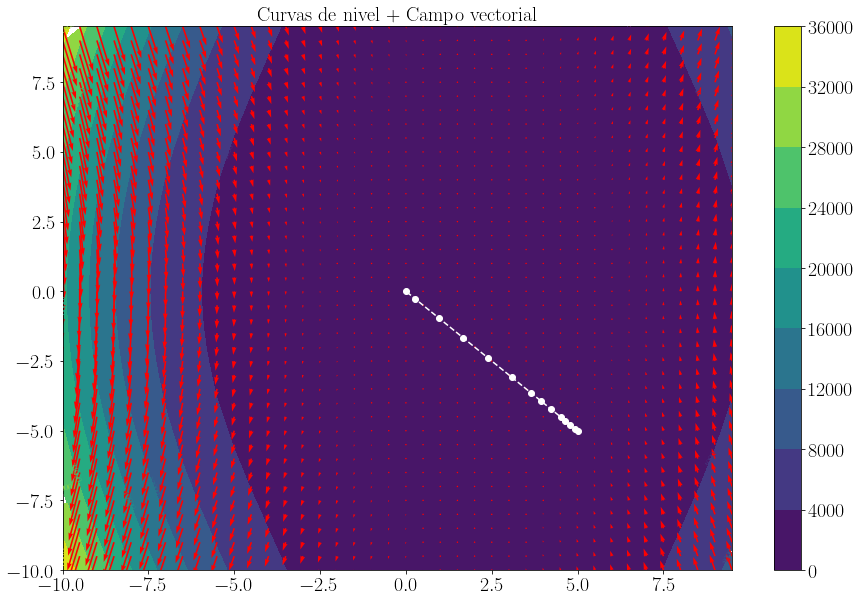

In [ ]:
plt.figure(figsize=(15,10))
gradx,grady = np.gradient(F(X,Y),dx)
contours = plt.contourf(X,Y,F(X,Y), 10)
plt.clabel(contours, inline=True, fontsize=8)
plt.colorbar()
plt.plot(xk[:,0], xk[:,1],'o--w')
plt.quiver(X,Y,gradx,grady, color = 'red')
plt.title('Curvas de nivel + Campo vectorial')
plt.show()

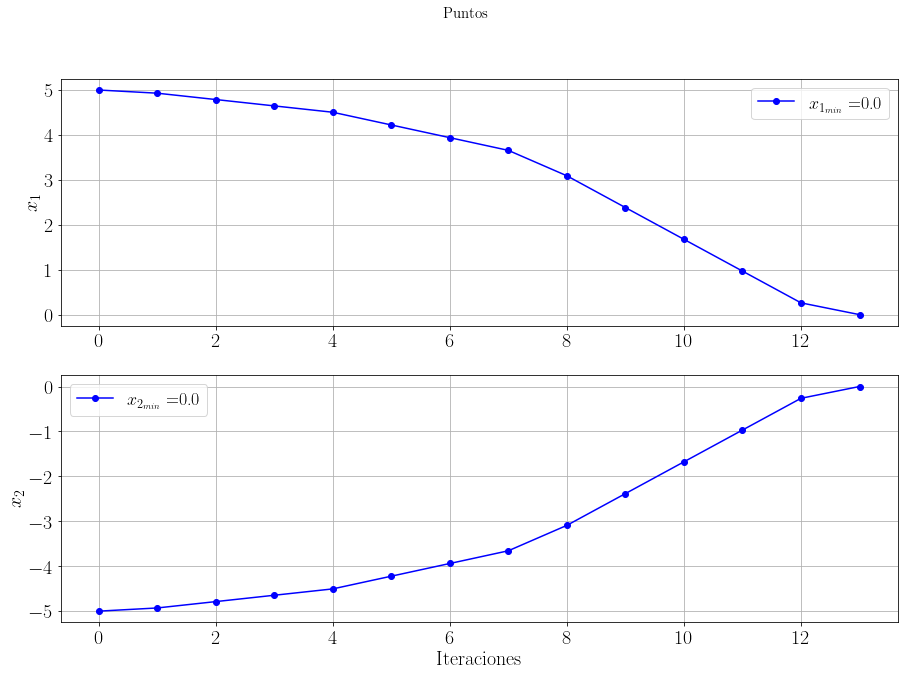

In [ ]:
iterations = np.arange(0,len(xk))
       
fig, axs = plt.subplots(2,figsize=(15,10))
fig.suptitle('Puntos')
axs[0].plot(iterations,xk[:,0],'o-b', label = '$x_{1_{min}} =$'+str(xk[-1,0]))
axs[0].grid('on')
axs[0].set_ylabel('$x_{1}$')
axs[0].legend(fontsize=18)

axs[1].plot(iterations,xk[:,1],'o-b', label = '$x_{2_{min}} =$'+str(xk[-1,1]))
axs[1].grid('on')
axs[1].set_ylabel('$x_{2}$')
axs[1].set_xlabel('Iteraciones')
axs[1].legend(fontsize=18)
plt.show()

# Caso IV. Función de Beale
La función de Beale está definida por

\begin{equation}
 f\left(x_{1},x_{2}\right) = \left(1.5 - x_{1} + x_{1}x_{2}\right)^{2} + \left(2.25 - x_{1} + x_{1}x_{2}^{2}\right)^{2} + \left(2.62 - x_{1} + x_{1}x_{2}^{3}\right)^{2}.
\end{equation}

Utilice el método de LS para minimizar la función de Booth considerando que el espacio de búsqueda está dado por $x_{i} \in [-4.5,4.5] \forall i=1,2$. Además, considere como punto inicial

\begin{equation}
 x_{0} = \begin{bmatrix} -3 & 3 \end{bmatrix}^{T}.
\end{equation}

# Caso V. Función de dos variables

Sea la función

\begin{equation}
  f\left(x_{1},x_{2}\right) = \left(x_{1}^2+x_{2}-11\right)^2 + \left(x_{1} + x_{2}^2-7\right)^2,
\end{equation}

encuentre los valores mínimos utilizando el algoritmo de LS.

In [ ]:
X0 = np.array([-5,5]) # Puntos iniciales
#X0 = np.array([[np.random.rand()],[np.random.rand()]])
    
eta = 0.15 # η ∈ (0, 14)
tol = 1e-4; # Tolerancia del algoritmo
max_trust_radius = 0.9 # Radio máximo de confianza
    
# Función objetivo
F = lambda x: (x[0]**2+x[1]-11)**2 + (x[0] + x[1]**2-7)**2
gradF = lambda x: np.array([2*x[1]**2+4*x[0]*x[1]+4*x[0]**3-42*x[0]-14,
                                                         4*x[1]**3+(4*x[0]-26)*x[1]+2*x[0]**2-22])
B = lambda x: np.array([[4*(x[1]+x[0]**2-11)+8*x[0]**2+2, 4*x[1]+4*x[0]],
                                                [4*x[1]+4*x[0], 4*(x[1]**2+x[0]-7)+8*x[1]**2+2]])
    
Fmin, xk = trust_region_reflective(X0, F, gradF, B, eta, tol)

## Graficación de resultados

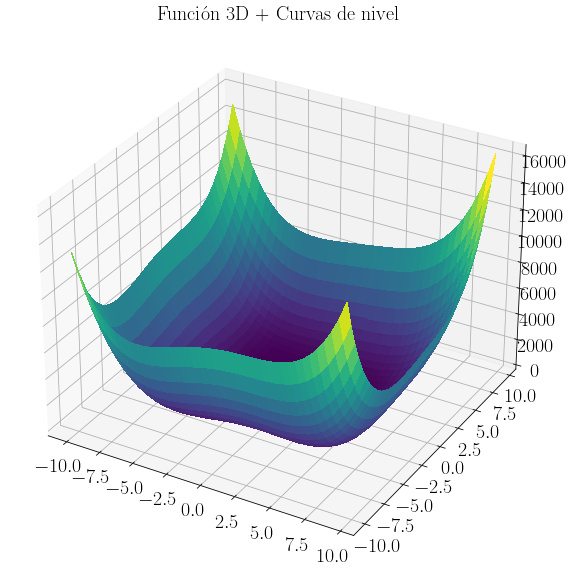

In [ ]:
xmin = -10 # coordenada mínima
xmax =  10 # coordenada máxima
dx = 0.5 # distancia entre coordenadas consecutivas

dom = np.arange(xmin,xmax,dx)
X,Y = np.meshgrid(dom,dom)
F = lambda x1,x2: (x1**2+x2-11)**2 + (x1 + x2**2-7)**2

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(15,10))
surf = ax.plot_surface(X, Y, F(X,Y), cmap=cm.viridis,linewidth=0, antialiased=False)
plt.title('Función 3D + Curvas de nivel')
plt.show()

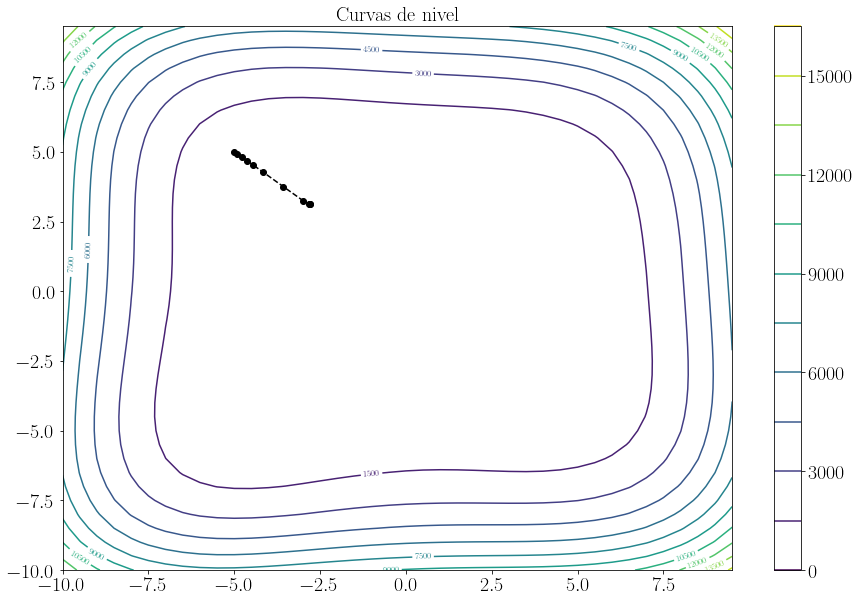

In [ ]:
plt.figure(figsize=(15,10));
contours = plt.contour(X, Y, F(X,Y), 15)
plt.clabel(contours, inline=True, fontsize=8)
plt.colorbar()
plt.plot(xk[:,0], xk[:,1],'o--k')
plt.title('Curvas de nivel')
plt.show()

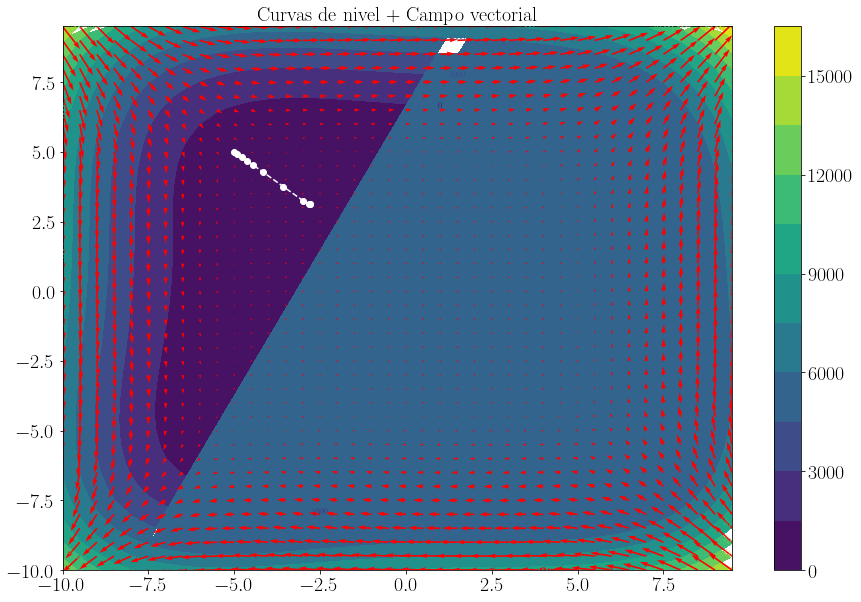

In [ ]:
plt.figure(figsize=(15,10))
gradx,grady = np.gradient(F(X,Y),dx)
contours = plt.contourf(X,Y,F(X,Y), 15)
plt.clabel(contours, inline=True, fontsize=8)
plt.colorbar()
plt.plot(xk[:,0], xk[:,1],'o--w')
plt.quiver(X,Y,gradx,grady, color = 'red')
plt.title('Curvas de nivel + Campo vectorial')
plt.show()

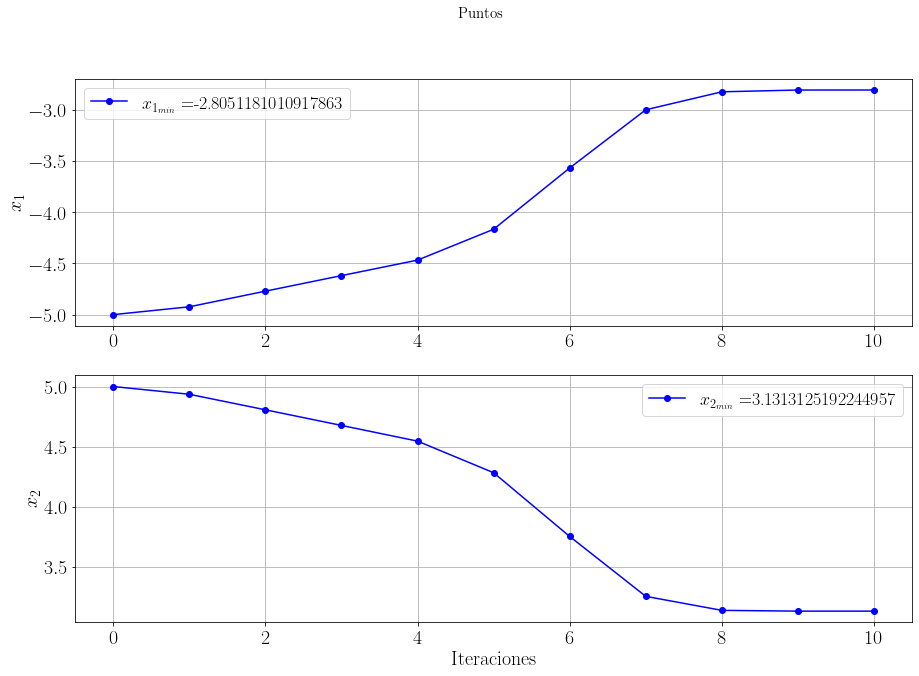

In [ ]:
iterations = np.arange(0,len(xk))
       
fig, axs = plt.subplots(2,figsize=(15,10))
fig.suptitle('Puntos')
axs[0].plot(iterations,xk[:,0],'o-b', label = '$x_{1_{min}} =$'+str(xk[-1,0]))
axs[0].grid('on')
axs[0].set_ylabel('$x_{1}$')
axs[0].legend(fontsize=18)

axs[1].plot(iterations,xk[:,1],'o-b', label = '$x_{2_{min}} =$'+str(xk[-1,1]))
axs[1].grid('on')
axs[1].set_ylabel('$x_{2}$')
axs[1].set_xlabel('Iteraciones')
axs[1].legend(fontsize=18)
plt.show()

# Referencias
[1] Ernesto, R. W., Ernesto, L. G., Rafael, B., & Yolanda, G. G. (2016). Perfiles de comportamiento numérico de los métodos de búsqueda immune network algorithm y bacterial foraging optimization algorithm en funciones benchmark. *Ingeniería, investigación y tecnología*, 17(4), 479-490.